# Support Vector Machine [SVM] - Classification:

**Usage**: classification & regression both [supervised].

**Goal**: Finding the best decision boundary (hyperplane) separating the classes with maximum margin.

- **Hyperplane**: Decision boundary - separating classes with max margin. 
    - Equation: $w^T\cdot x+b = 0$

- **Support Vectors**: Closest data points to hyperplane. [crucial in determining the hyperplane & margin in SVM].

- **Margin**: Distance between hyperplane & support vectors. SVM aims to maximize the margin to improve performance.

- **Kernel**: Function to map the data to a higher-dimensional space enabling SVM to handle non-linearly separable data.

- **Hard Margin**: max-margin in hyperplane that perfectly separates the data. [no misclassifications]

- **Soft Margin**: allows some missclassifications when data is not perfectly separable.

- **C**: regularization term balancing margin maximization & missclass. penalties. $\uparrow C \propto$ *stricter penalties*.

- **Hinge Loss**: loss function.


## SVM Functionality:

- Hyperplane:

    $w^T \cdot x + b = 0$
    - $w$: weight (normal to hyperplane)
    - $b$: bias (shifting the plane)
    - $x$: features (inputs)

- To predict / margin-region:
    
    $y^{(k)} =
    \begin{cases}
    +1 & \text{if } \mathbf{w}^T \mathbf{x} + b \geq 0 \\
    -1 & \text{if } \mathbf{w}^T \mathbf{x} + b < 0
    \end{cases}
    $

**Optimization**:

$||\text{w}|| = \sqrt{w_1^2 + w_2^2 + ... + w_n^2}$

> where, $||\text{w}||$ - Norm of Vector (Euclidean norm)

1. $\text{Margin} = \frac{2}{||\text{w}||}$

2. $\text{Hard-Margin} = \min_{w,b} \frac{1}{2} {||\text{w}||^2}$, 
    - subject to: $y_i(w^T \cdot x_i + b) \geq 1$
    - No missclassifications allowed 

3. $\text{soft-margin} = \min_{w,b,\xi} \frac{1}{2}{||\text{w}||^2} + C\cdot \sum_{i=1}^{n}{\xi_i}$

    - subject to: $y_i(w^T \cdot x_i + b) \geq 1 - \xi_i$, $\xi \geq 0$  
    - allows some missclassifications.
    - $\xi_i$ refers to the penalty (slack).

4. Kernel Function $K(x, x')$:

    - linear: $K(x, x') = x^T \cdot x'$
    - polynomial: $K(x, x') = (x^T \cdot x' + 1)^d$
    - Gaussian/RBF: $K(x, x') = \exp{(- \gamma || x - x'||^2)}$

    - used when is not linearly separable (converts the data into higher dimensons) 


5. Hinge Loss:

    $f(x) = w^T \cdot x_i + b$

    $L(y, f(x)) = max(0, 1 - y_i\cdot f(x))$

6. Decision Boundary:

    $\text{w} = \sum_{i=1}^n{\alpha_i \cdot y_i \cdot x_i} + b$

Optimization Objective:

- $(\text{maximize Hard/Soft-Margin}) + C \cdot L(y, f(x))$

Weights/Parameters are adjusted using gradient descent (generally stochastic gd) as follow:

- $w_i = w_{i-1} - \eta \cdot \nabla J(w_i)$

    here, $\eta$ refers to learning rate,
          $J(w)$ refers to total loss.

- **Dual Problem** is used generally for non-linear based classification. This includes the optimization of kernel functions involves maximizing the Lagrange multipliers.

---
# SVM Implementation:

- Dataset : [News Classification Datasets 🔗](https://www.kaggle.com/datasets/rmisra/news-category-dataset)

## Imports & Data Load:

In [4]:
import os, warnings
import numpy as np, pandas as pd
import seaborn as sns, matplotlib.pyplot as plt
import plotly.graph_objects as go 
import plotly.express as px 

warnings.filterwarnings('ignore')
%matplotlib inline

In [5]:
df = pd.read_json('./dataset/News_Category_Dataset_v3.json', lines=True)
df.head(5)


,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22


## Data Analysis and preprocessing:

In [6]:
# about data:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209527 entries, 0 to 209526
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   link               209527 non-null  object        
 1   headline           209527 non-null  object        
 2   category           209527 non-null  object        
 3   short_description  209527 non-null  object        
 4   authors            209527 non-null  object        
 5   date               209527 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(5)
memory usage: 9.6+ MB


In [7]:
# Available News Categories
categories = df['category'].unique()
print(f"""News Categories/Classes:
{categories}""")

News Categories/Classes:
['U.S. NEWS' 'COMEDY' 'PARENTING' 'WORLD NEWS' 'CULTURE & ARTS' 'TECH'
 'SPORTS' 'ENTERTAINMENT' 'POLITICS' 'WEIRD NEWS' 'ENVIRONMENT'
 'EDUCATION' 'CRIME' 'SCIENCE' 'WELLNESS' 'BUSINESS' 'STYLE & BEAUTY'
 'FOOD & DRINK' 'MEDIA' 'QUEER VOICES' 'HOME & LIVING' 'WOMEN'
 'BLACK VOICES' 'TRAVEL' 'MONEY' 'RELIGION' 'LATINO VOICES' 'IMPACT'
 'WEDDINGS' 'COLLEGE' 'PARENTS' 'ARTS & CULTURE' 'STYLE' 'GREEN' 'TASTE'
 'HEALTHY LIVING' 'THE WORLDPOST' 'GOOD NEWS' 'WORLDPOST' 'FIFTY' 'ARTS'
 'DIVORCE']


In [8]:
# Category-wise balance check:
categories_count = df['category'].value_counts().reset_index()
categories_count

,category,count
0,POLITICS,35602
1,WELLNESS,17945
2,ENTERTAINMENT,17362
3,TRAVEL,9900
4,STYLE & BEAUTY,9814
5,PARENTING,8791
6,HEALTHY LIVING,6694
7,QUEER VOICES,6347
8,FOOD & DRINK,6340
9,BUSINESS,5992


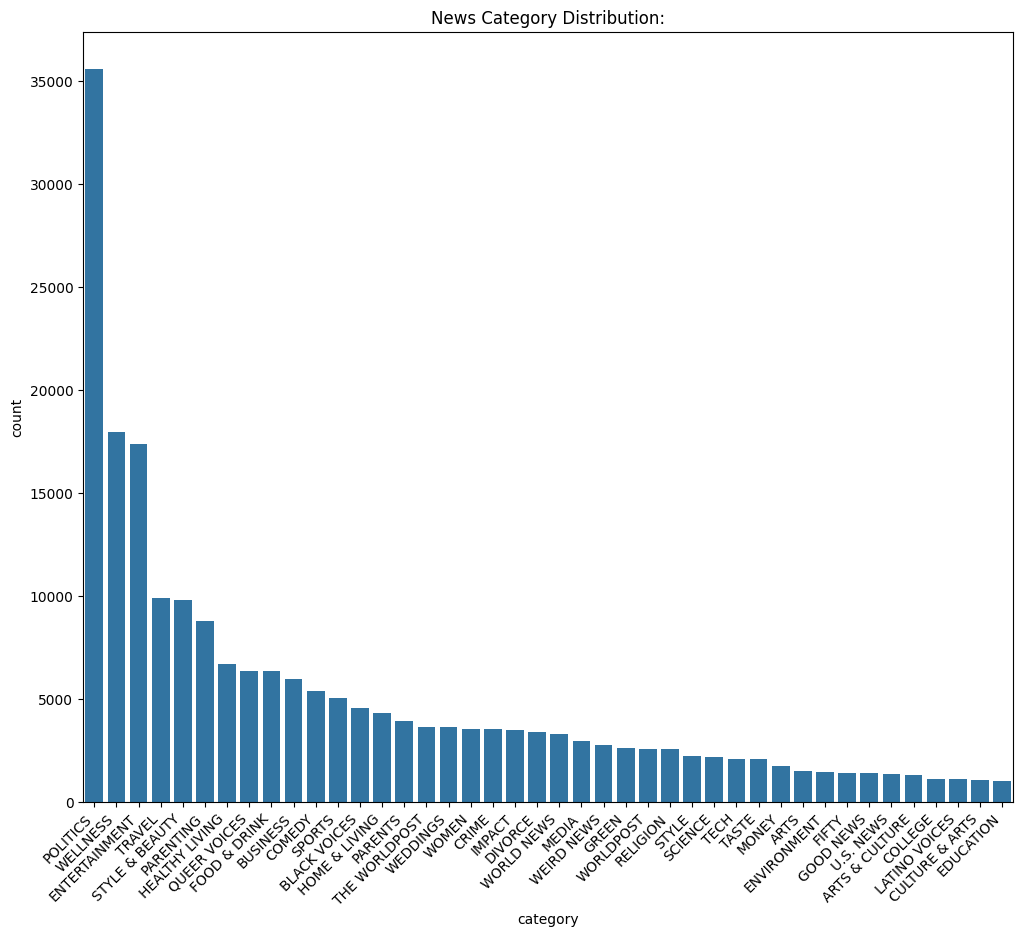

In [9]:
plt.figure(figsize=(12,10))
sns.barplot(df['category'].value_counts(), orient='v')
plt.title('News Category Distribution:')
plt.xticks(rotation=45, ha='right')
plt.show()

In [10]:
# Any one sample

i = np.random.randint(1,1000)

print(f"""
CATEGORY: {df.loc[i]['category']}
HEADLINE: {df.loc[i]['headline']}
DESC.: {df.loc[i]['short_description']}
""")


CATEGORY: POLITICS
HEADLINE: Ivanka Trump Backed Her Dad Even As She Knew He Lied, Ex-White House Aide Points Out
DESC.: She shouldn't have stood by Donald Trump's side as he kept pushing  lies that the election he lost was rigged, said former press secretary Stephanie Grisham.



---

### Feature Engineering:

In [11]:
df.columns

Index(['link', 'headline', 'category', 'short_description', 'authors', 'date'], dtype='object')

Selecting only required columns:

In [12]:
req_cols = ['headline', 'short_description', 'category'] 

data = df[req_cols]
data.head(5)

,headline,short_description,category
0,Over 4 Million Americans Roll Up Sleeves For O...,Health experts said it is too early to predict...,U.S. NEWS
1,"American Airlines Flyer Charged, Banned For Li...",He was subdued by passengers and crew when he ...,U.S. NEWS
2,23 Of The Funniest Tweets About Cats And Dogs ...,"""Until you have a dog you don't understand wha...",COMEDY
3,The Funniest Tweets From Parents This Week (Se...,"""Accidentally put grown-up toothpaste on my to...",PARENTING
4,Woman Who Called Cops On Black Bird-Watcher Lo...,Amy Cooper accused investment firm Franklin Te...,U.S. NEWS


Combining the headline and short description columns:

In [13]:
data.loc[:, 'news'] = data['headline'].fillna('') + ' ' + data['short_description'].fillna('')
data = data[['news','category']]
print(data.loc[i]['news'])

Ivanka Trump Backed Her Dad Even As She Knew He Lied, Ex-White House Aide Points Out She shouldn't have stood by Donald Trump's side as he kept pushing  lies that the election he lost was rigged, said former press secretary Stephanie Grisham.


### News Data Preprocessing [Text Preprocessing]:

In [14]:
import nltk, re
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer, WordNetLemmatizer

In [15]:
# nltk.download('all')

In [16]:
stop_words = set(stopwords.words('english'))
stemmer = SnowballStemmer(language='english')
lemmatizer = WordNetLemmatizer()

In [17]:
def preprocess_text(text: str) -> str:
    
    text = text.lower().strip()
    tokens = []
    for token in text.split():
        if token not in stop_words:
            # if stemmer.stem:
            if lemmatizer.lemmatize:
                # tokens.append(stemmer.stem(token))
                tokens.append(lemmatizer.lemmatize(token))
            else:
                tokens.append(token)
    return " ".join(tokens)

In [18]:
# Sample Text:
preprocess_text(data.loc[i]['news'])

"ivanka trump backed dad even knew lied, ex-white house aide point stood donald trump's side kept pushing lie election lost rigged, said former press secretary stephanie grisham."

In [19]:
data['preprocessed_news'] = data['news'].apply(lambda txt: preprocess_text(txt))

In [20]:
data.head(2)

,news,category,preprocessed_news
0,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,4 million american roll sleeve omicron-targete...
1,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,"american airline flyer charged, banned life pu..."


---

### Preprocessed News data vectorization & Label Encoding:

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

In [22]:
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2), stop_words='english')
label_encoder = LabelEncoder()

In [23]:
X = vectorizer.fit_transform(data['preprocessed_news'])
y = label_encoder.fit_transform(data['category'])

---
### Splitting Train Test Data:

In [24]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"""
TRAIN DATA SHAPE: {X_train.shape}
TEST DATA SHAPE: {X_test.shape}      
""")


TRAIN DATA SHAPE: (146668, 5000)
TEST DATA SHAPE: (62859, 5000)      



---
### Handling the Imbalances among the data:

In [56]:
# Setting up minority classes and majority classes threshold:

MINORITY_THRESHOLD = 3000
MAJORITY_THRESHOLD = 10000

In [57]:
train_data_categories, counts = np.unique(y_train, return_counts=True)
category_counts = {int(cls): int(count) for cls, count in zip(train_data_categories, counts)}

In [58]:
minority_classes = [cls for cls, count in category_counts.items() if count < MINORITY_THRESHOLD]
majority_classes = [cls for cls, count in category_counts.items() if count > MAJORITY_THRESHOLD]

category wise sampling strategy:

In [59]:
oversampling_strat:dict = {cls: MINORITY_THRESHOLD for cls in minority_classes}
undersampling_strat:dict = {cls: MAJORITY_THRESHOLD for cls in majority_classes}

In [60]:
undersampling_strat

{10: 10000, 24: 10000, 38: 10000}

sampling pipeline:

In [61]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from collections import Counter

over = SMOTE(sampling_strategy=oversampling_strat, random_state=42)
under = RandomUnderSampler(sampling_strategy=undersampling_strat, random_state=42)

sampling_pipeline = Pipeline([
    ('under', under),
    ('over',over)
])

In [62]:
X_train_sampled, y_train_sampled = sampling_pipeline.fit_resample(X_train, y_train)


print(f"""
SAMPLED TRAIN DATA [Hybrid Sampling - over and under sampling both]
Features: {X_train_sampled.shape}
Categories: {y_train_sampled.shape}
""")


SAMPLED TRAIN DATA [Hybrid Sampling - over and under sampling both]
Features: (165088, 5000)
Categories: (165088,)



---
### SVM Model Fit and predict:

- Will train model with both imbalanced data and balanced (sampled data) as well to compare the both.

In [63]:
from sklearn.svm import SVC

In [ ]:
# SVM training on Sampled Data:
svm = SVC(kernel='linear', class_weight='balanced', random_state=42, C=1,verbose=True)
svm.fit(X_train_sampled, y_train_sampled)

[LibSVM]

---
### Trained Model Evaluation:

In [40]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [ ]:
y_pred = svm.predict(X_test)

**Accuracy:**

In [ ]:
print(f"""
Accuracy Score [balanced]: {accuracy_score(y_test, y_pred):.2f}""")


Accuracy Score [balanced]: 0.50        



**Confusion Matrix:**

In [ ]:
cm = confusion_matrix(y_test, y_pred)

In [1]:
# plt.figure(figsize=(12,10), dpi=500)
# sns.heatmap(cm, annot=True)
# plt.title('Confusion Matrix: Model Trained on Imbalanced Data')
# plt.show()

**Classification Report:**

In [ ]:
print(f"""
Classification Report
{classification_report(y_test, y_pred)}
{'-'*75}
""")


Classification Report
              precision    recall  f1-score   support

           0       0.13      0.32      0.19       438
           1       0.19      0.29      0.23       388
           2       0.36      0.45      0.40      1378
           3       0.39      0.45      0.41      1796
           4       0.26      0.48      0.33       297
           5       0.40      0.47      0.43      1620
           6       0.42      0.61      0.50      1094
           7       0.27      0.34      0.30       309
           8       0.67      0.73      0.70      1013
           9       0.26      0.53      0.35       315
          10       0.70      0.47      0.56      5148
          11       0.30      0.37      0.34       442
          12       0.11      0.23      0.14       413
          13       0.57      0.57      0.57      1896
          14       0.19      0.29      0.23       402
          15       0.27      0.42      0.33       781
          16       0.28      0.32      0.30      2001
    

---
### Dumping Trained Model:

In [ ]:
is_bal = True

model_file_name = f"svm_acc{int(accuracy_score(y_test, y_pred)*100)}_{'bal' if is_bal else 'imb'}_{int(X_train.shape[1])}.pkl"
# Save Trained model pickle file:
from pickle4 import pickle

with open(model_file_name, 'wb') as file:
    pickle.dump(svm, file)

---
By Kirtan Ghelani $@SculptSoft$


`status: Training Complete| Hyperparameter tuning & performance improvement left.`